# Network to Optical Protocol

Now we can conver the fusion network into instructions that can be executed on a SEMM device.

In [1]:
import networkx as nx
from optyx.compiler.mbqc import OpenGraph, Measurement, Fusion, FusionNetwork
from graphix.pauli import Plane

/Users/williamcashman/code/optyx/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
g = nx.Graph([(0, 1), (0, 2), (2, 1), (0, 3), (2, 3)])

paths = [[0, 1, 2, 3]]
measurements = {i: Measurement(i, Plane.XY) for i in range(3)}

og = OpenGraph(g, measurements, [0], [3])

fusions=[
    Fusion(node1=0, node2=2, fusion_type='Y'),
    Fusion(node1=0, node2=3, fusion_type='Y')
]
fn = FusionNetwork(paths, measurements, fusions)

The fusion network can be visualised as the following
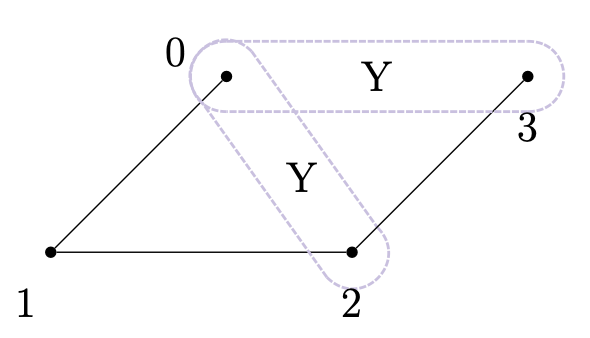

We now compile this into instructions that are executable on our abstract SEMM machine

In [3]:
from optyx.compiler.semm import compile_linear_fn

gflow = og.find_gflow()
ins = compile_linear_fn(fn, gflow.partial_order())
for instruction in ins:
    print(instruction)

NextResourceStateOp()
NextNodeOp(node_id=0)
FusionOp(delay=6, fusion_type='X')
FusionOp(delay=3, fusion_type='X')
MeasureOp(delay=0, measurement=Measurement(angle=0, plane=<Plane.XY: 0>))
NextNodeOp(node_id=1)
MeasureOp(delay=0, measurement=Measurement(angle=1, plane=<Plane.XY: 0>))
NextNodeOp(node_id=2)
FusionOp(delay=0, fusion_type='X')
MeasureOp(delay=0, measurement=Measurement(angle=2, plane=<Plane.XY: 0>))
NextNodeOp(node_id=3)
FusionOp(delay=0, fusion_type='X')
UnmeasuredOp()


The compiled instructions may be visualised with the following photonic diagram
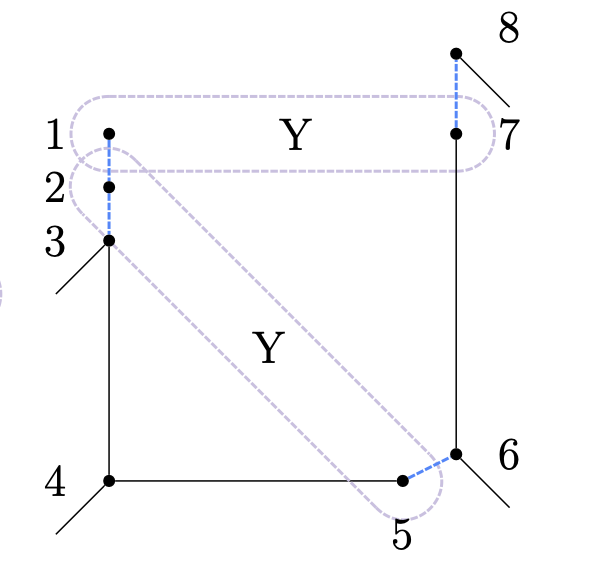